In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [9]:
df.Price.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [10]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [11]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [14]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,A,B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,33,7976,5,NaN,0,11,B,184966.930730,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,46,10309,1,240.0,1,16,B,300009.450063,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,34,7759,0,229.0,1,3,B,220925.908524,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,23,5735,3,1084.0,0,5,B,175616.227217,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,35,5776,1,2078.0,2,4,B,150226.531644,0,1


In [15]:
df.drop(['A'],axis=1,inplace=True)

In [16]:
df.drop(['Ecology_2'],axis=1,inplace=True)

In [17]:
df.rename(columns={'B': 'Ecology_2'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,33,7976,5,NaN,0,11,B,184966.930730,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,46,10309,1,240.0,1,16,B,300009.450063,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,34,7759,0,229.0,1,3,B,220925.908524,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,23,5735,3,1084.0,0,5,B,175616.227217,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,35,5776,1,2078.0,2,4,B,150226.531644,1


In [18]:
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df.drop(['A'],axis=1,inplace=True)
df.drop(['Ecology_3'],axis=1,inplace=True)
df.rename(columns={'B': 'Ecology_3'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2,Ecology_3
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,B,184966.930730,1,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,B,300009.450063,1,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,B,220925.908524,1,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,B,175616.227217,1,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,B,150226.531644,1,1


In [19]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df.drop(['A'],axis=1,inplace=True)
df.drop(['Shops_2'],axis=1,inplace=True)
df.rename(columns={'B': 'Shops_2'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,1,1,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,1,1,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,1,1,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,1,1,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,1,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2        10000 non-null uint8
Ecology_3        10000 non-null uint8
Shops_2          10000 non-null uint8
dtypes: float64(8), int64(9), uint8(3)
memory usage: 1.3 MB


In [21]:
df.drop(['Healthcare_1'],axis=1,inplace=True)

In [22]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399,0.990300,0.972500,0.917500
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865,0.098015,0.163543,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


In [23]:
df[df['Rooms'] >= 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,74,19083,2,5,15,317265.323792,1,1,1
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,17,3079,59,0,8,479525.147323,1,1,1
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,264,0,0,1,78364.616704,1,1,1
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,31,7010,5,3,7,310305.074733,1,0,1
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,31,7010,5,3,7,455264.882666,1,0,1
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,66,10573,1,3,8,229661.964416,1,1,1
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,53,13670,4,1,11,455446.393758,1,1,1
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,4,915,0,0,0,112693.641769,1,1,1
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,34,7759,0,1,3,206148.845716,1,1,1
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,74,19083,2,5,15,622888.825328,1,1,1


In [30]:
df['Square'].median() / df['Rooms'].median()


26.25665496200676

In [31]:
df.loc[df['Rooms'] > 5, 'Rooms'] = df.loc[df['Rooms'] > 5, 'Square'] // (df['Square'].median() / df['Rooms'].median())

In [32]:
df[df['Rooms'] >= 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,17,3079,59,0,8,479525.147323,1,1,1
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,31,7010,5,3,7,310305.074733,1,0,1
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,31,7010,5,3,7,455264.882666,1,0,1
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,53,13670,4,1,11,455446.393758,1,1,1
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,4,915,0,0,0,112693.641769,1,1,1
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,34,7759,0,1,3,206148.845716,1,1,1
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,74,19083,2,5,15,622888.825328,1,1,1
4762,4070,21,5.0,114.313752,88.492650,9.0,6,5.0,1960,0.034331,25,5487,3,0,4,499830.937577,1,1,1
5361,2879,78,5.0,118.871952,69.023509,10.0,15,16.0,1998,0.092291,21,4346,2,1,2,496026.671162,1,1,1
5466,3454,8,5.0,112.135525,79.795451,10.0,4,17.0,1999,0.437885,23,5735,3,0,5,471833.787538,1,1,1


In [36]:
df[df['Square'] < 25]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,43,8429,3,3,9,412511.088764,1,1,1
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,4,915,0,0,0,107604.269441,1,1,1
1476,1775,101,1.0,23.583220,18.442768,3.0,3,5.0,1968,0.225825,41,6558,7,3,2,108232.647619,0,1,1
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,5,1564,0,0,0,137597.601458,1,1,1
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,25,4756,16,5,8,88871.750230,1,1,1
3084,3732,112,1.0,20.213128,13.800281,3.0,5,9.0,1974,0.069660,31,6119,4,1,2,113050.229914,1,1,1
3166,15127,150,1.0,17.046188,20.036232,8.0,7,12.0,1982,0.300323,52,10311,6,1,9,74222.110465,1,1,1
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,9,1892,0,0,1,97560.720383,1,1,1
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,16,3433,4,4,5,369472.403061,1,1,1
3794,523,101,1.0,18.509177,15.170851,3.0,5,5.0,1970,0.225825,41,6558,7,3,2,115845.861527,0,1,1


In [37]:
df.loc[df['Square'] < 25, 'Square'] = df.loc[df['Square'] < 25, 'Rooms'] * (df['Square'].median() / df['Rooms'].median())

In [38]:
df['Square'].median() / df['LifeSquare'].median()

1.6026832729128355

In [39]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df.loc[df['LifeSquare'].isnull(), 'Square'] / (df['Square'].median() / df['LifeSquare'].median())

In [40]:
df.drop(['KitchenSquare'],axis=1,inplace=True)

In [42]:
df.loc[df['HouseFloor'] < df['Floor'] , 'HouseFloor'] = df.loc[df['HouseFloor'] < df['Floor'] , 'Floor']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id             10000 non-null int64
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
LifeSquare     10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Shops_1        10000 non-null int64
Price          10000 non-null float64
Ecology_2      10000 non-null uint8
Ecology_3      10000 non-null uint8
Shops_2        10000 non-null uint8
dtypes: float64(6), int64(9), uint8(3)
memory usage: 1.2 MB


In [46]:
df.to_csv('train_norm.csv', index=False, encoding='utf-8')

### Проверим теперь тестовую выборку

In [106]:
df = pd.read_csv('test.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [50]:
df['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [51]:
df['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [52]:
df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [108]:
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df.drop(['A'],axis=1,inplace=True)
df.drop(['Ecology_3'],axis=1,inplace=True)
df.rename(columns={'B': 'Ecology_3'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_3
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,11,2748,1,NaN,0,0,B,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,6,1437,3,NaN,0,2,B,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,30,7538,87,4702.0,5,5,B,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,23,4583,3,NaN,3,3,B,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,2,629,1,NaN,0,0,A,1


In [109]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df.drop(['A'],axis=1,inplace=True)
df.drop(['Ecology_2'],axis=1,inplace=True)
df.rename(columns={'B': 'Ecology_2'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_3,Ecology_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,NaN,0,0,B,1,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,6,1437,3,NaN,0,2,B,1,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,B,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,NaN,3,3,B,1,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,NaN,0,0,A,1,1


In [110]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df.drop(['A'],axis=1,inplace=True)
df.drop(['Shops_2'],axis=1,inplace=True)
df.rename(columns={'B': 'Shops_2'}, inplace=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_3,Ecology_2,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,NaN,0,0,1,1,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,6,1437,3,NaN,0,2,1,1,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,1,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,NaN,3,3,1,1,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,NaN,0,0,1,1,0


In [111]:
df.drop(['Healthcare_1'],axis=1,inplace=True)
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_3,Ecology_2,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800,0.970200,0.990400,0.917600
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365,0.170052,0.097518,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000,1.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000,1.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000


In [112]:
df.loc[df['Rooms'] > 5, 'Rooms'] = df.loc[df['Rooms'] > 5, 'Square'] // (df['Square'].median() / df['Rooms'].median())
df.loc[df['Square'] < 25, 'Square'] = df.loc[df['Square'] < 25, 'Rooms'] * (df['Square'].median() / df['Rooms'].median())
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df.loc[df['LifeSquare'].isnull(), 'Square'] / (df['Square'].median() / df['LifeSquare'].median())
df.drop(['KitchenSquare'],axis=1,inplace=True)
df.loc[df['HouseFloor'] < df['Floor'] , 'HouseFloor'] = df.loc[df['HouseFloor'] < df['Floor'] , 'Floor']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Id             5000 non-null int64
DistrictId     5000 non-null int64
Rooms          5000 non-null float64
Square         5000 non-null float64
LifeSquare     5000 non-null float64
Floor          5000 non-null int64
HouseFloor     5000 non-null float64
HouseYear      5000 non-null int64
Ecology_1      5000 non-null float64
Social_1       5000 non-null int64
Social_2       5000 non-null int64
Social_3       5000 non-null int64
Helthcare_2    5000 non-null int64
Shops_1        5000 non-null int64
Ecology_3      5000 non-null uint8
Ecology_2      5000 non-null uint8
Shops_2        5000 non-null uint8
dtypes: float64(5), int64(9), uint8(3)
memory usage: 561.6 KB


In [113]:
df.to_csv('test_norm.csv', index=False, encoding='utf-8')

In [1]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score as r2,mean_absolute_error as mae,mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt

In [143]:
df=pd.read_csv('train_norm.csv')

In [144]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
0,14038,35,2.0,47.981561,29.442751,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,1,1,1
1,15053,41,3.0,65.683640,40.049543,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,1,1,1
2,4765,53,2.0,44.947953,29.197612,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,1,1,1
3,5809,58,2.0,53.352981,52.731512,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,1,1,1
4,10783,99,1.0,39.649192,23.776169,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,1,1,1


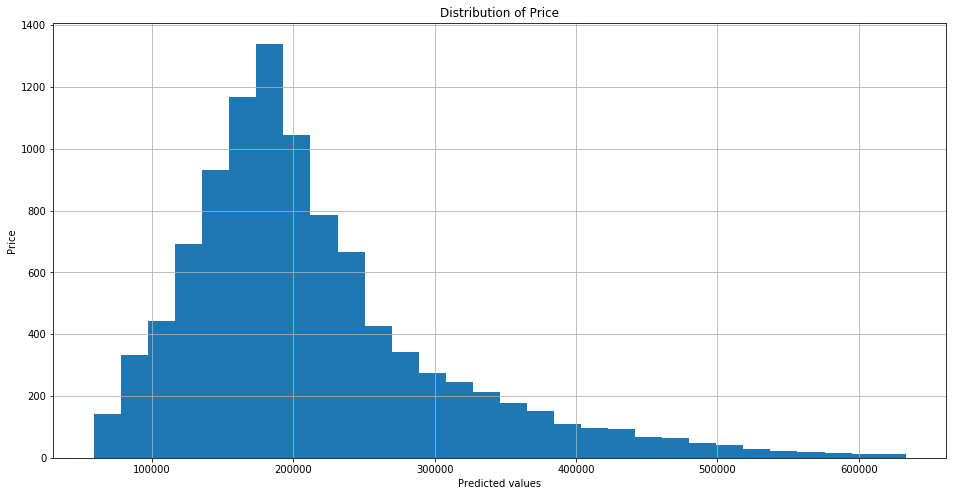

In [145]:
plt.figure(figsize=(16,8))
df.Price.hist(bins=30)
plt.xlabel('Predicted values')
plt.ylabel('Price')
plt.title('Distribution of Price')
plt.show()

In [146]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2',
 'Ecology_3',
 'Shops_2']

In [147]:
feature_names=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor', 'HouseYear',
 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2',
 'Ecology_3', 'Shops_2']
target_name='Price'

In [148]:
df=df[feature_names+[target_name]]
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2,Ecology_3,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,7,9.0,1969,0.089040,33,7976,5,0,11,1,1,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,7,9.0,1978,0.000070,46,10309,1,1,16,1,1,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,8,12.0,1968,0.049637,34,7759,0,1,3,1,1,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,8,17.0,1977,0.437885,23,5735,3,0,5,1,1,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,11,12.0,1976,0.012339,35,5776,1,2,4,1,1,1,150226.531644


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id             10000 non-null int64
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
LifeSquare     10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Shops_1        10000 non-null int64
Ecology_2      10000 non-null int64
Ecology_3      10000 non-null int64
Shops_2        10000 non-null int64
Price          10000 non-null float64
dtypes: float64(6), int64(12)
memory usage: 1.4 MB


In [150]:
df['Floor'] = df['Floor'].astype('float64')
df['DistrictId'] = df['DistrictId'].astype('float64')
df['HouseYear'] = df['HouseYear'].astype('float64')
df['Social_1'] = df['Social_1'].astype('float64')
df['Social_2'] = df['Social_2'].astype('float64')
df['Social_3'] = df['Social_3'].astype('float64')
df['Helthcare_2'] = df['Helthcare_2'].astype('float64')
df['Shops_1'] = df['Shops_1'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id             10000 non-null int64
DistrictId     10000 non-null float64
Rooms          10000 non-null float64
Square         10000 non-null float64
LifeSquare     10000 non-null float64
Floor          10000 non-null float64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null float64
Ecology_1      10000 non-null float64
Social_1       10000 non-null float64
Social_2       10000 non-null float64
Social_3       10000 non-null float64
Helthcare_2    10000 non-null float64
Shops_1        10000 non-null float64
Ecology_2      10000 non-null int64
Ecology_3      10000 non-null int64
Shops_2        10000 non-null int64
Price          10000 non-null float64
dtypes: float64(14), int64(4)
memory usage: 1.4 MB


In [151]:
df['Id'] = df['Id'].astype(str)
df['Id'].dtype

dtype('O')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id             10000 non-null object
DistrictId     10000 non-null int64
Rooms          10000 non-null float64
Square         10000 non-null float64
LifeSquare     10000 non-null float64
Floor          10000 non-null int64
HouseFloor     10000 non-null float64
HouseYear      10000 non-null int64
Ecology_1      10000 non-null float64
Social_1       10000 non-null int64
Social_2       10000 non-null int64
Social_3       10000 non-null int64
Helthcare_2    10000 non-null int64
Shops_1        10000 non-null int64
Ecology_2      10000 non-null int64
Ecology_3      10000 non-null int64
Shops_2        10000 non-null int64
Price          10000 non-null float64
dtypes: float64(6), int64(11), object(1)
memory usage: 1.4+ MB


In [152]:
feature_names_for_stand=df[feature_names].select_dtypes(include='float64').columns.to_list()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']

In [153]:
scaler=StandardScaler()
stand_features=scaler.fit_transform(df[feature_names_for_stand])

In [154]:
df[feature_names_for_stand]=pd.DataFrame(stand_features,columns=feature_names_for_stand)

In [155]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2,Ecology_3,Shops_2,Price
0,14038,-0.353348,0.139393,-0.400242,-0.102203,-0.291306,-0.727915,-0.010081,-0.250529,0.474169,0.654880,-0.127533,-0.883480,1.408356,1,1,1,184966.930730
1,15053,-0.215687,1.369690,0.443466,0.035791,-0.291306,-0.727915,-0.010036,-0.998053,1.215681,1.237169,-0.295384,-0.213923,2.448700,1,1,1,300009.450063
2,4765,0.059635,0.139393,-0.544828,-0.105392,-0.100498,-0.235604,-0.010086,-0.581588,0.531208,0.600720,-0.337347,-0.213923,-0.256195,1,1,1,220925.908524
3,5809,0.174352,0.139393,-0.144232,0.200782,-0.100498,0.584915,-0.010041,2.680470,-0.096225,0.095553,-0.211458,-0.883480,0.159943,1,1,1,175616.227217
4,10783,1.115034,-1.090904,-0.797375,-0.175925,0.471924,-0.235604,-0.010046,-0.894969,0.588247,0.105786,-0.295384,0.455633,-0.048126,1,1,1,150226.531644


In [156]:
df.to_csv('train_scaled.csv',index=False,encoding='utf-8')

In [157]:
X=df[feature_names]
y=df[target_name]

In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True,random_state=42)

In [159]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6252 to 73
Data columns (total 17 columns):
Id             2500 non-null object
DistrictId     2500 non-null float64
Rooms          2500 non-null float64
Square         2500 non-null float64
LifeSquare     2500 non-null float64
Floor          2500 non-null float64
HouseFloor     2500 non-null float64
HouseYear      2500 non-null float64
Ecology_1      2500 non-null float64
Social_1       2500 non-null float64
Social_2       2500 non-null float64
Social_3       2500 non-null float64
Helthcare_2    2500 non-null float64
Shops_1        2500 non-null float64
Ecology_2      2500 non-null int64
Ecology_3      2500 non-null int64
Shops_2        2500 non-null int64
dtypes: float64(13), int64(3), object(1)
memory usage: 351.6+ KB


In [160]:
lr_model=LinearRegression()

In [161]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
import seaborn as sns

In [163]:
def evaluate_preds(true_values,pred_values):
    print('R2\t'+str(round(r2(true_values,pred_values),3))+'\n'+
          'MAE\t'+str(round(mae(true_values,pred_values),3))+'\n'+
          'MSE\t'+str(round(mse(true_values,pred_values),3)))
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_values,y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

R2	0.513
MAE	44781.912
MSE	4167780770.861


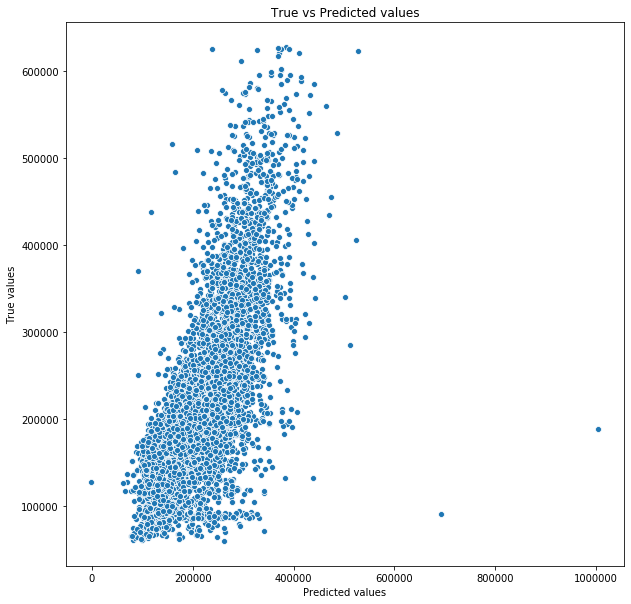

In [164]:
y_train_preds=lr_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.463
MAE	46112.225
MSE	4729700287.41


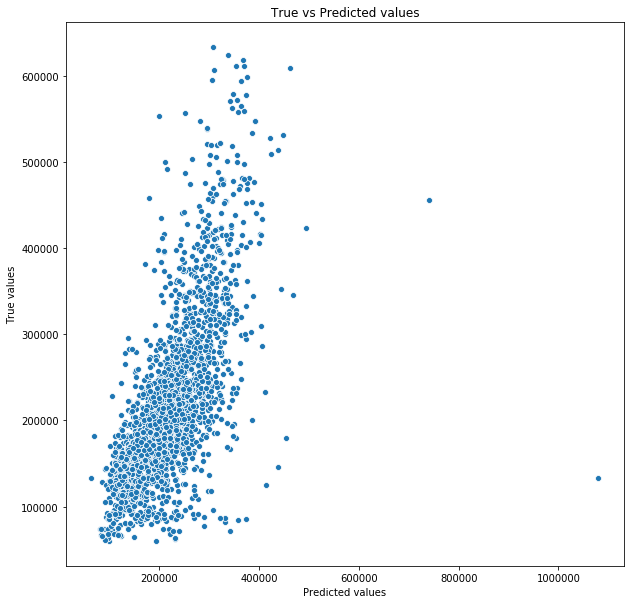

In [165]:
y_test_preds=lr_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [166]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

C:\Users\sb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R2	0.945
MAE	12232.283
MSE	472354079.496


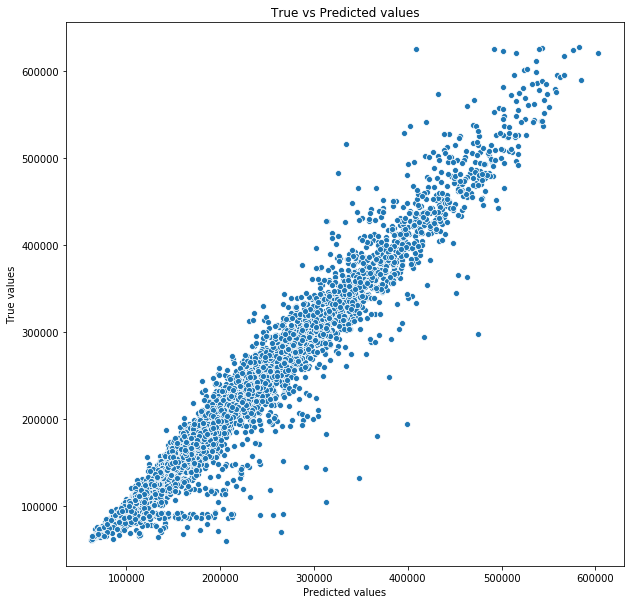

In [167]:
y_train_preds=rf_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.681
MAE	31807.029
MSE	2811396741.066


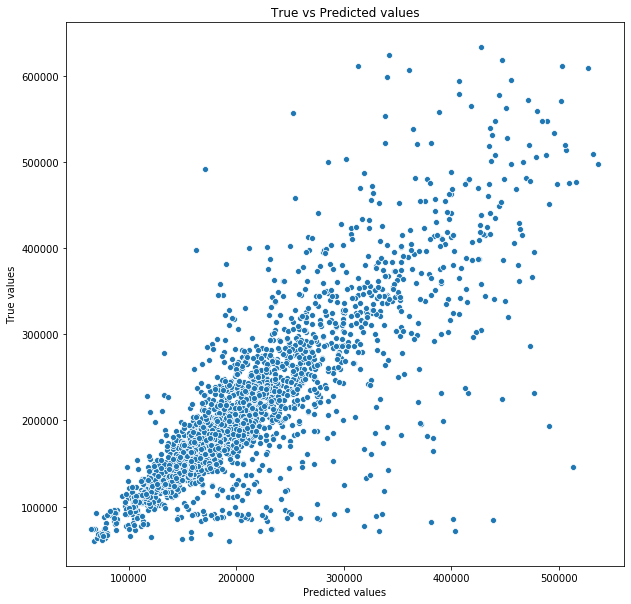

In [168]:
y_test_preds=rf_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [169]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2	0.762
MAE	29223.702
MSE	2040379927.213


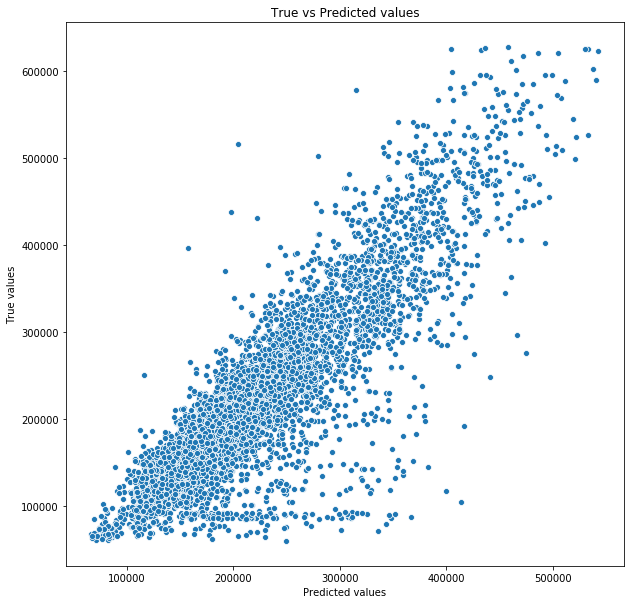

In [135]:
y_train_preds=gb_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.695
MAE	31677.676
MSE	2684896486.534


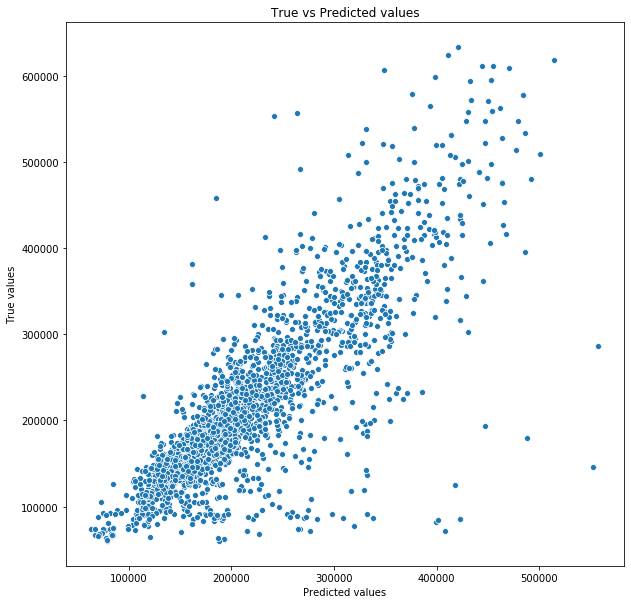

In [170]:
y_test_preds=gb_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [171]:
gb_model=GradientBoostingRegressor(random_state=42)

In [172]:
%%time
params={'n_estimators':[50,100,200],
        'max_depth':[3,5,7]}
gs=GridSearchCV(gb_model,params,scoring='r2',cv=KFold(n_splits=3,random_state=21,shuffle=True),n_jobs=-1)
gs.fit(X,y)

Wall time: 24.5 s


GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [173]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [174]:
gs.best_score_

0.7313460181608878

In [175]:
final_model=GradientBoostingRegressor(n_estimators=200,max_depth=5,random_state=42)
final_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2	0.908
MAE	18829.164
MSE	791193385.36


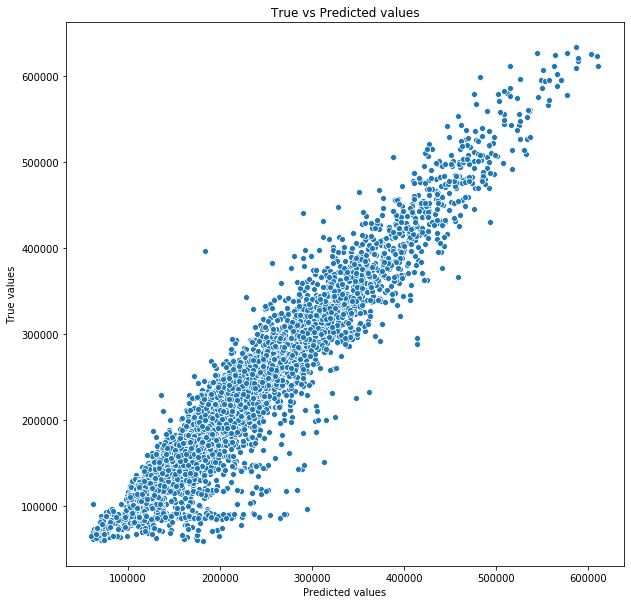

In [99]:
y_train_preds=final_model.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2	0.718
MAE	28782.626
MSE	2482353536.064


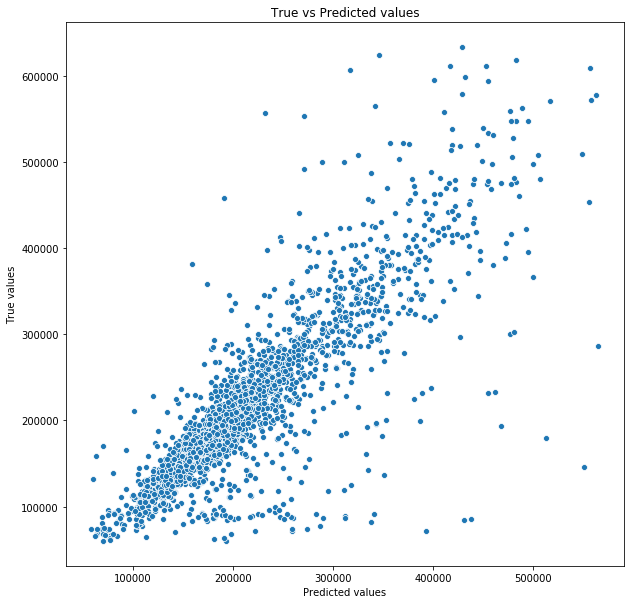

In [177]:
y_test_preds=final_model.predict(X_test)
evaluate_preds(y_test,y_test_preds)

In [101]:
import pickle

In [102]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [103]:
with open('model.pkl','wb') as file:
    pickle.dump(final_model,file)